      Iter       Train Loss   Remaining Time 
         1           1.0190           11.88s
         2           0.9192           11.94s
         3           0.8272           10.96s
         4           0.7834           10.34s
         5           0.7109           10.27s
         6           0.6368           10.88s
         7           0.5797           10.74s
         8           0.5610           10.46s
         9           0.5185           10.36s
        10           0.4984           10.32s
        20           0.1999            9.46s
        30           0.1313            8.56s
        40           0.0790            8.05s
        50           0.0511            7.59s
        60           0.0352            7.22s
        70           0.0245            6.76s
        80           0.0162            6.35s
        90           0.0114            5.95s
       100           0.0077            5.56s
       200           0.0004            1.63s
      Iter       Train Loss   Remaining Time 
        

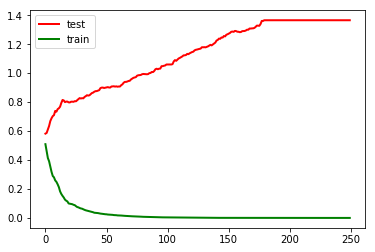

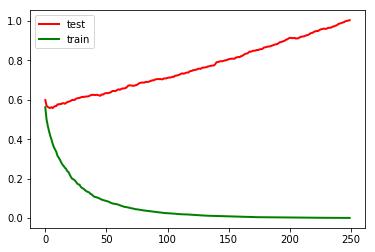

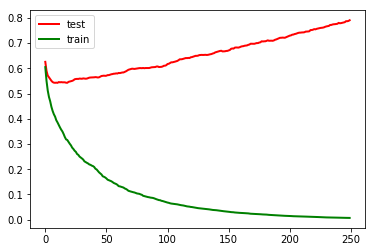

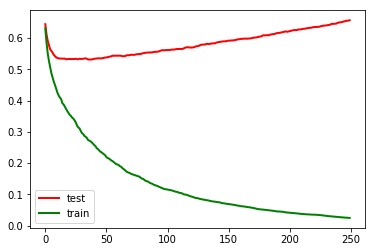

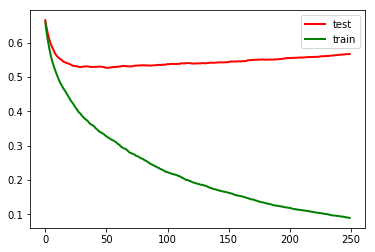

In [92]:
import pandas
import numpy as np
import math
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss
import matplotlib.pyplot as plt

PATH = '/Users/vlasnikita/Documents/vls/py/ml_py_coursera/'

# 1.
# Загрузите выборку из файла gbm-data.csv с помощью pandas и преобразуйте ее в массив numpy (параметр values у датафрейма). 
# В первой колонке файла с данными записано, была или нет реакция. 
# Все остальные колонки (d1 - d1776) содержат различные характеристики молекулы, такие как размер, форма и т.д. 
# Разбейте выборку на обучающую и тестовую, используя функцию train_test_split 
# с параметрами test_size = 0.8 и random_state = 241.
data = pandas.read_csv(PATH + 'lesson_5/gbm-data.csv')
y = data['Activity']
X = data.drop('Activity', axis=1).values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state=241)

# 2.
# Обучите GradientBoostingClassifier с параметрами n_estimators=250, verbose=True, random_state=241 
# и для каждого значения learning_rate из списка [1, 0.5, 0.3, 0.2, 0.1] проделайте следующее:
# 2.1 Используйте метод staged_decision_function 
#     для предсказания качества на обучающей и тестовой выборке на каждой итерации.
# 2.2 Преобразуйте полученное предсказание с помощью сигмоидной функции по формуле 
#     1 / (1 + e^{−y_pred}), где y_pred — предсказанное значение.
# 2.3 Вычислите и постройте график значений log-loss 
#     (которую можно посчитать с помощью функции sklearn.metrics.log_loss) на обучающей и тестовой выборках, 
#      а также найдите минимальное значение метрики и номер итерации, на которой оно достигается.
learning_rates = [1, 0.5, 0.3, 0.2, 0.1]
flattener = lambda x: x.map(lambda y: sigmoid(y[0]))
minimal_log_losses = []

def sigmoid(x):
    return 1 / (1 + math.exp(-x[0]))

def array_map(f,x):
    return np.array([f(xi) for xi in x])

def normalize_decisions(x):
    return array_map(sigmoid, x)

def calculate_log_loss(y_true, y_pred):
    return log_loss(y_true, y_pred)

def plot_log_loss(rate, test_loss, train_loss):
    plt.figure()
    plt.plot(test_loss, 'r', linewidth=2)
    plt.plot(train_loss, 'g', linewidth=2)
    plt.legend(['test', 'train'])
    plt.savefig('gbm_plots/rate_' + str(rate) + '.png')

def get_minimal_log_loss(rates, X, y, X_test, y_test):
    for rate in learning_rates:
        gbc = GradientBoostingClassifier(n_estimators=250, random_state=241, learning_rate=rate, verbose=True)
        gbc.fit(X, y)
        
        y_pred_train = np.array(list(gbc.staged_decision_function(X)))
        y_pred_train = np.array(array_map(normalize_decisions, y_pred_train))
            
        y_pred_test = np.array(list(gbc.staged_decision_function(X_test)))
        y_pred_test = np.array(array_map(normalize_decisions, y_pred_test))
        
        train_loss = [calculate_log_loss(np.array(y), y_pred_train[i]) for i in range(len(y_pred_train))]
        test_loss = [calculate_log_loss(np.array(y_test), y_pred_test[i]) for i in range(len(y_pred_test))]
        
        plot_log_loss(rate, test_loss, train_loss)
        minimal_log_losses.append([
            rate,
            min(test_loss),
            test_loss.index(min(test_loss))
        ])
     
get_minimal_log_loss(learning_rates, X_train, y_train, X_test, y_test)

print minimal_log_losses
# [[1, 0.5822942594278476, 0], 
# [0.5, 0.5582025523164261, 6], 
# [0.3, 0.5423141110024554, 10], 
# [0.2, 0.531094637596885, 36], 
# [0.1, 0.5269201872275844, 51]]
    
    
# 3. Как можно охарактеризовать график качества на тестовой выборке, 
# начиная с некоторой итерации: переобучение (overfitting) или недообучение (underfitting)? 
# В ответе укажите одно из слов overfitting либо underfitting.
a1 = 'overfitting'
file = open(PATH + 'lesson_5/II_1.txt', 'w')
file.write(a1)

# 4. Приведите минимальное значение log-loss на тестовой выборке и номер итерации, 
# на котором оно достигается, при learning_rate = 0.2.
a2 = str(round(0.531094637596885, 2)) + ' 37'
file = open(PATH + 'lesson_5/II_2.txt', 'w')
file.write(a2)

# 5. На этих же данных обучите RandomForestClassifier с количеством деревьев, равным количеству итераций, 
# на котором достигается наилучшее качество у градиентного бустинга из предыдущего пункта, 
# c random_state=241 и остальными параметрами по умолчанию. 
# Какое значение log-loss на тесте получается у этого случайного леса? 
# (Не забывайте, что предсказания нужно получать с помощью функции predict_proba. 
# В данном случае брать сигмоиду от оценки вероятности класса не нужно)
rfc = RandomForestClassifier(n_estimators=37, random_state=241)
rfc.fit(X_train, y_train)
a3 = calculate_log_loss(y_test, rfc.predict_proba(X_test))
file = open(PATH + 'lesson_5/II_3.txt', 'w')
file.write(str(round(a3,2)))

In [95]:
data

Activity        D1        D2    D3    D4        D5        D6        D7  \
0            1  0.000000  0.497009  0.10  0.00  0.132956  0.678031  0.273166   
1            1  0.366667  0.606291  0.05  0.00  0.111209  0.803455  0.106105   
2            1  0.033300  0.480124  0.00  0.00  0.209791  0.610350  0.356453   
3            1  0.000000  0.538825  0.00  0.50  0.196344  0.724230  0.235606   
4            0  0.100000  0.517794  0.00  0.00  0.494734  0.781422  0.154361   
5            0  0.133333  0.771035  0.20  0.25  0.122153  0.677398  0.267224   
6            1  0.066700  0.567401  0.10  0.00  0.116578  0.689802  0.274886   
7            1  0.133333  0.610057  0.15  0.00  0.105176  0.759602  0.313393   
8            1  0.000000  0.776816  0.05  0.00  0.458446  0.738631  0.246347   
9            0  0.100000  0.768150  0.10  0.25  0.262299  0.598972  0.377065   
10           1  0.000000  0.660210  0.00  0.00  0.383456  0.720737  0.222087   
11           0  0.166667  0.563907  0.00  0.25  0.254419  0.756516  0.228250   
12           1  0.133333  0.762576  0.35  0.00  0.287140  0.613026  0.200829   
13           1  0.066700  0.631525  0.05  0.00  0.234391  0.715887  0.181886   
14           1  0.066700  0.521589  0.00  0.00  0.227515  0.691512  0.264940   
15           1  0.100000  0.657124  0.15  0.00  0.447315  0.696919  0.193229   
16           1  0.100000  0.885983  0.05  0.25  0.524173  0.704125  0.162819   
17           1  0.000000  0.489133  0.10  0.00  0.088500  0.607943  0.347955   
18           1  0.000000  0.538825  0.00  0.25  0.237227  0.719965  0.382199   
19           0  0.033300  0.675038  0.10  0.00  0.235896  0.657470  0.212516   
20           0  0.100000  0.686625  0.25  0.00  0.104709  0.607495  0.356636   
21           1  0.166667  0.578646  0.00  0.00  0.173919  0.657420  0.317747   
22           0  0.100000  0.665270  0.10  0.25  0.251867  0.714488  0.170534   
23           0  0.066700  0.475563  0.00  0.25  0.401865  0.764165  0.218053   
24           0  0.000000  0.375649  0.00  0.00  0.242260  0.755498  0.226478   
25           1  0.000000  0.534259  0.05  0.00  0.111008  0.622691  0.400883   
26           1  0.066700  0.542305  0.15  0.00  0.183809  0.648122  0.354422   
27           0  0.166667  0.722598  0.15  0.00  0.194978  0.797810  0.187969   
28           1  0.166667  0.638055  0.05  0.00  0.138331  0.658073  0.313260   
29           1  0.066700  0.565660  0.05  0.00  0.133900  0.602021  0.311601   
...        ...       ...       ...   ...   ...       ...       ...       ...   
3721         1  0.033300  0.481720  0.00  0.00  0.114101  0.719833  0.293265   
3722         1  0.000000  0.694186  0.15  0.00  0.293354  0.636711  0.286999   
3723         0  0.166667  0.691269  0.15  0.25  0.087200  0.833496  0.106056   
3724         1  0.133333  0.559984  0.10  0.00  0.107175  0.622075  0.333753   
3725         1  0.033300  0.438248  0.00  0.00  0.110333  0.609393  0.405318   
3726         0  0.200000  0.653780  0.00  0.50  0.072600  0.647421  0.321597   
3727         0  0.066700  0.567011  0.00  0.00  0.383932  0.723871  0.254747   
3728         1  0.033300  0.714933  0.15  0.25  0.150352  0.719908  0.310732   
3729         0  0.000000  0.372990  0.00  0.00  0.202711  0.732980  0.255754   
3730         1  0.066700  0.575001  0.00  0.00  0.269273  0.609576  0.330971   
3731         0  0.000000  0.566193  0.20  0.00  0.157010  0.645297  0.282444   
3732         1  0.000000  0.679264  0.10  0.00  0.208038  0.609945  0.306327   
3733         0  0.166667  0.515541  0.00  0.00  0.117869  0.725294  0.201651   
3734         1  0.033300  0.506224  0.05  0.00  0.127842  0.709754  0.251244   
3735         1  0.000000  0.719994  0.20  0.00  0.145131  0.658951  0.320307   
3736         0  0.033300  0.688500  0.10  0.25  0.165650  0.722846  0.225075   
3737         0  0.133333  0.760487  0.10  0.25  0.214941  0.660811  0.239333   
3738         0  0.133333  0.819665  0.20  0.50  0.159593  0.700822  0.212851   
3739  

In [99]:
rfc2 = RandomForestClassifier(n_estimators=137, random_state=241)
rfc2.fit(X_train, y_train)
print calculate_log_loss(y_test, rfc2.predict_proba(X_test))

0.5291266980762527
